<a href="https://colab.research.google.com/github/malaakb1/ShAI-Final/blob/main/ShAI_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
url = 'https://raw.githubusercontent.com/malaakb1/ShAI-Final/main/Salaries.csv'
df = pd.read_csv(url)
# Basic Data Exploration:
print("The shape of dataset is = ", df.shape)
print("The data types of dataset's columns are : ", df.dtypes)
print("The sum of missing values in each column", df.isnull().sum())



The shape of dataset is =  (148654, 13)
The data types of dataset's columns are :  Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
The sum of missing values in each column Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [8]:
# Descriptive Statistics:
print(df.describe())
print("The range of salaries is = ", df['TotalPay'].max() - df['TotalPay'].min())

                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448840    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000    -618.130000       -618.130000    2011.

In [9]:
# Data Cleaning:
ColumnsToDrop = ['Notes', 'Status']
CleanedData = df.drop(ColumnsToDrop, axis=1)
MeanValues = df.mean()
NoNanDf = CleanedData.fillna(MeanValues)
print(NoNanDf)

            Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle       BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18000   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02000   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13000   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00000   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60000   
...                                                ...           ...   
148649                                       Custod

<ipython-input-9-d6f9a023e6aa>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  MeanValues = df.mean()


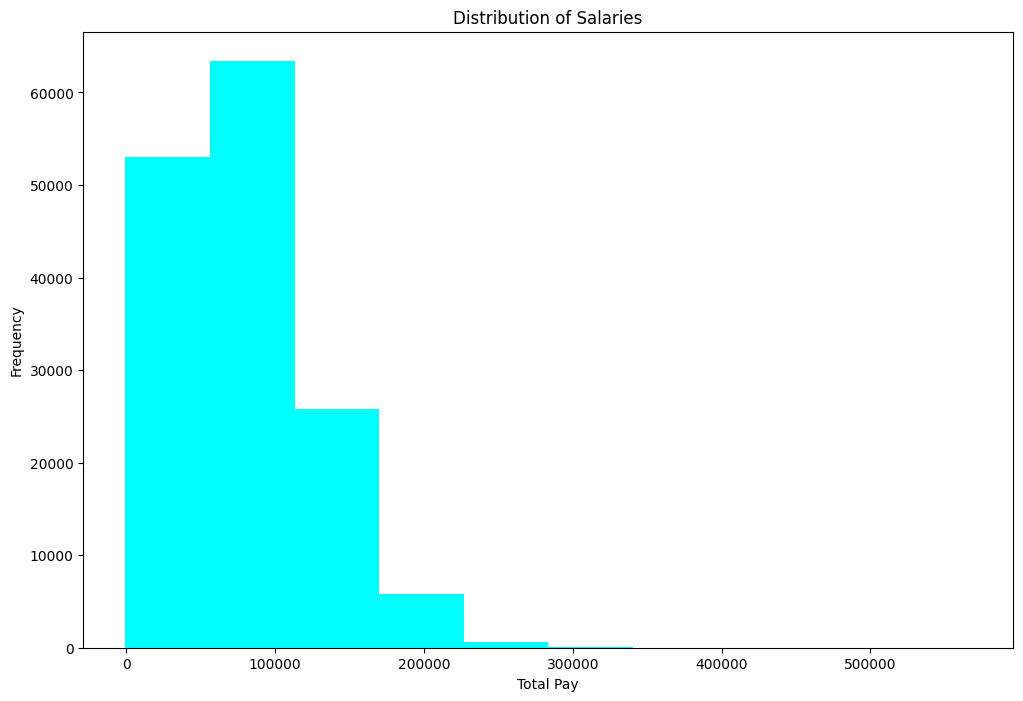

In [10]:
# Basic Data Visualization:
#Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.hist(NoNanDf['TotalPay'], bins=10, color='cyan')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

In [ ]:
#Pie Chart
plt.figure(figsize=(500, 500))
DeoartmentCounts = NoNanDf['JobTitle'].value_counts()
plt.pie(DeoartmentCounts, labels=DeoartmentCounts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

In [ ]:
# Grouped Analysis:
SummaryStatistics = NoNanDf.groupby('JobTitle').agg(['mean', 'median', 'min', 'max', 'std'])
print(SummaryStatistics)
DepartmentSalaryAvg = NoNanDf.groupby('JobTitle')['TotalPay'].mean()
print("Average salary by department:", DepartmentSalaryAvg)

In [ ]:
# Simple Correlation Analysis:
Correlation = NoNanDf['TotalPay'].corr(NoNanDf['OtherPay'])
print("Correlation between TotalPay and OtherPay:", Correlation)
plt.figure(figsize=(20, 20))
plt.scatter(NoNanDf['OtherPay'], NoNanDf['TotalPay'], alpha=0.5)
plt.xlabel('Other Pay')
plt.ylabel('Total Pay')
plt.title('Scatter Plot of Total Pay vs Other Pay')
plt.show()

In [ ]:
# Summary of Insights:
'''1. Basic Data Exploration:
- The dataset contains information about employees' salaries, job titles, and other related attributes.
- Upon initial exploration, we found that there are 148654 rows and 13 columns in the dataset.
- The data types of each column are
(JobTitle    :         object,
BasePay      :       float64,
OvertimePay   :      float64,
OtherPay      :      float64,
Benefits      :      float64,
TotalPay      :      float64,
TotalPayBenefits  :  float64,
Year         :         int64,
Notes         :      float64,
Agency         :      object,
Status        :      float64).
- There are 334,088 missing values across the dataset, which were handled by doping the all-Nan columns and filling the other Nan data in other columns with its mean
2. Descriptive Statistics:
- The mean salary across all employees is approximately 74768.321972.
- The range of salaries varies from -618.130000 to 567595.430000.
- The standard deviation of salaries is 50517.005274 .
3. Grouped Analysis:
- After grouping the data by job titles, we observed variations in average salaries among different job titles.
- Job titles such as (ACUPUNCTURIST) tend to have higher average salaries compared to others.
4. Simple Correlation Analysis:
- The correlation coefficient between ['OtherPay'] and ['TotalPay'] is approximately 0.4704820338291609.
- This indicates a moderate positive correlation between ['OtherPay'] and salary.
5. Basic Data Visualization:
- Histograms and bar charts were used to visualize the distribution of salaries and proportions of employees in different departments, respectively.
- The pie chart provided an overview of the proportion of employees in various departments.'''
